# **Telco Customer Churn** ( CRISP-DM Chapter 1)

##**1.Business Understanding**

###  Importing Necessary Libraries

In [1]:
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical computations
import matplotlib.ticker as mtick  # Custom tick locators for Matplotlib
import seaborn as sns  # Statistical data visualization
import matplotlib.pyplot as plt  # Plotting and visualization
import math  # Mathematical functions

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder  # Encoding categorical variables and scaling features
from sklearn.model_selection import train_test_split, RandomizedSearchCV  # Data splitting and hyperparameter tuning
from sklearn.neighbors import KNeighborsClassifier  # KNeighbors Classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression Classifier
from sklearn.metrics import (  # Metrics for model evaluation
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score,
    precision_recall_curve,
    auc,
    f1_score,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score
)

### Loading the Dataset

In [ ]:
df = pd.read_csv(
    "/content/WA_Fn-UseC_-Telco-Customer-Churn.csv",  # Path to the CSV file
    index_col='customerID'  # Use 'customerID' as the index for the DataFrame
)

##**2.  Data Understanding**

### Initial Data Exploration

**View the first few rows of the dataset**

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Get the shape of the dataset (number of rows and columns)**

In [ ]:
df.shape

(7043, 20)

**List all the column names and print unique values for each column to understand data distribution and possible preprocessing needs:**

In [ ]:
# Get the list of column names
df_columns = df.columns.tolist()

# Loop through each column and print the column name with its unique values
for column in df_columns:
    print(f"\nColumn: {column}")
    print(f"Unique Values: {df[column].unique()}")
    print("-" * 40)  # Separator for better readability


Column: gender
Unique Values: ['Female' 'Male']
----------------------------------------

Column: SeniorCitizen
Unique Values: [0 1]
----------------------------------------

Column: Partner
Unique Values: ['Yes' 'No']
----------------------------------------

Column: Dependents
Unique Values: ['No' 'Yes']
----------------------------------------

Column: tenure
Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
----------------------------------------

Column: PhoneService
Unique Values: ['No' 'Yes']
----------------------------------------

Column: MultipleLines
Unique Values: ['No phone service' 'No' 'Yes']
----------------------------------------

Column: InternetService
Unique Values: ['DSL' 'Fiber optic' 'No']
----------------------------------------

Column: OnlineSecurity
Unique Values: ['No'

**Summary statistics to get an overview of the data (mean, standard deviation, min, max, etc.)**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


**Information about the dataset to see data types, non-null counts, etc**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

**Converting TotalCharges to Float**

In [ ]:
# Change TotalCharges to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

**Checking and Cleaning PaymentMethod**

In [ ]:
# Check unique values in PaymentMethod
print(df['PaymentMethod'].unique())

['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [ ]:
# Remove "automatic" from PaymentMethod labels
df['PaymentMethod'] = df['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

**Payment Method Check**

In [ ]:
# Check unique values in PaymentMethod
print(df['PaymentMethod'].unique())

['Electronic check' 'Mailed check' 'Bank transfer' 'Credit card']


**Handling Missing Values**

In [ ]:
# Identify features with missing values
features_na = [feature for feature in df.columns if df[feature].isnull().sum() > 1]

# Loop through each feature with missing values and print the feature name and the percentage of missing values
for feature in features_na:
    print(f"{feature}: {round(df[feature].isnull().mean() * 100, 4)}% missing values")

TotalCharges: 0.1562% missing values


In [ ]:
# Check observations of missing values
df[df[features_na[0]].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer,52.55,NaN,No
3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card,56.05,NaN,No
7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No


**Dropping Rows with Missing Values**

In [ ]:
# Drop rows with missing values
df.dropna(inplace=True)

**Visualizing the Target Variable (Churn)**

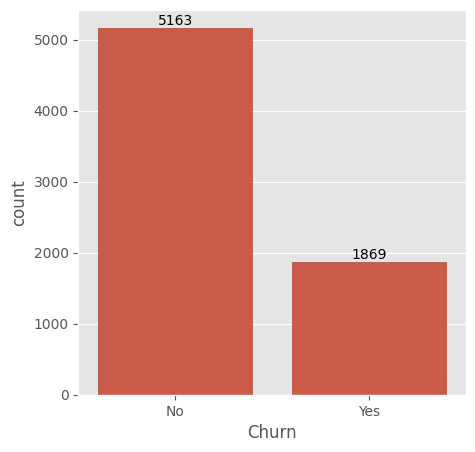

In [ ]:
# Apply ggplot style
plt.style.use('ggplot')

# Create a count plot for the target variable 'Churn'
plt.figure(figsize=(5, 5))
ax = sns.countplot(x='Churn', data=df)
ax.bar_label(ax.containers[0])
plt.show()

**Visualizing Categorical Features Related to Services**

In [ ]:
# Define a function to plot categorical features against the target
def plot_categorical_to_target(df, categorical_values, target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(categorical_values) / 2)

    fig = plt.figure(figsize=(12, 5 * number_of_rows))

    for index, column in enumerate(categorical_values, 1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        ax = sns.countplot(x=column, data=df, hue=target, palette="Blues")
        ax.set_title(column)

    plt.tight_layout()
    plt.show()

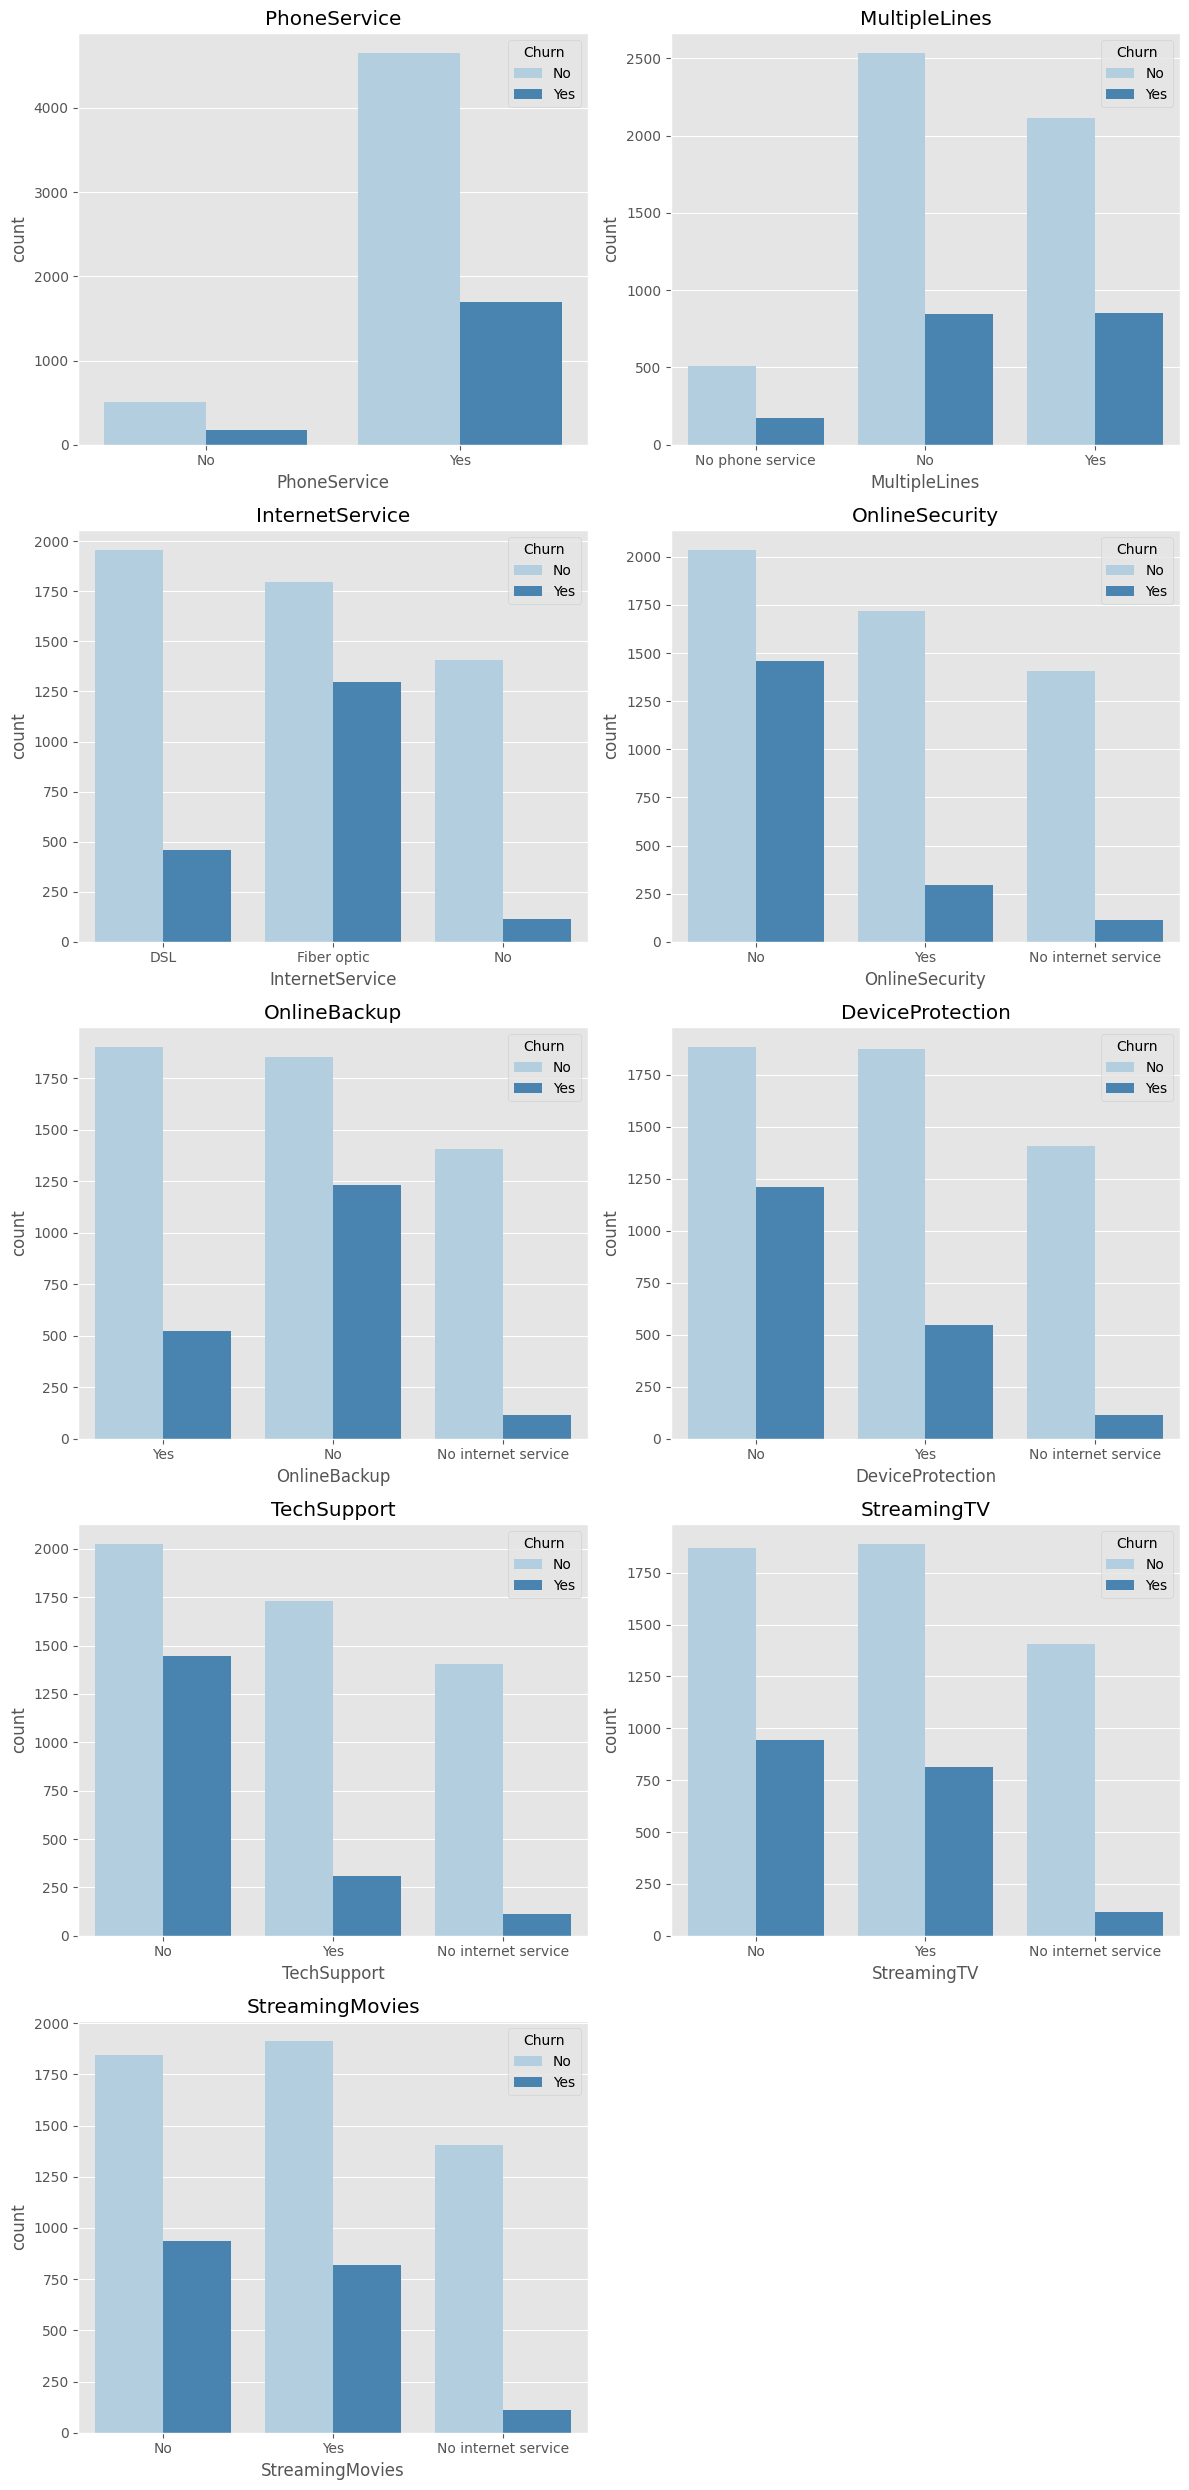

In [ ]:
# List of service-related categorical features
customer_services = ["PhoneService", "MultipleLines", "InternetService", "OnlineSecurity",
                     "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

# Plot these features
plot_categorical_to_target(df, customer_services, "Churn")

**Visualizing Customer Account Information**

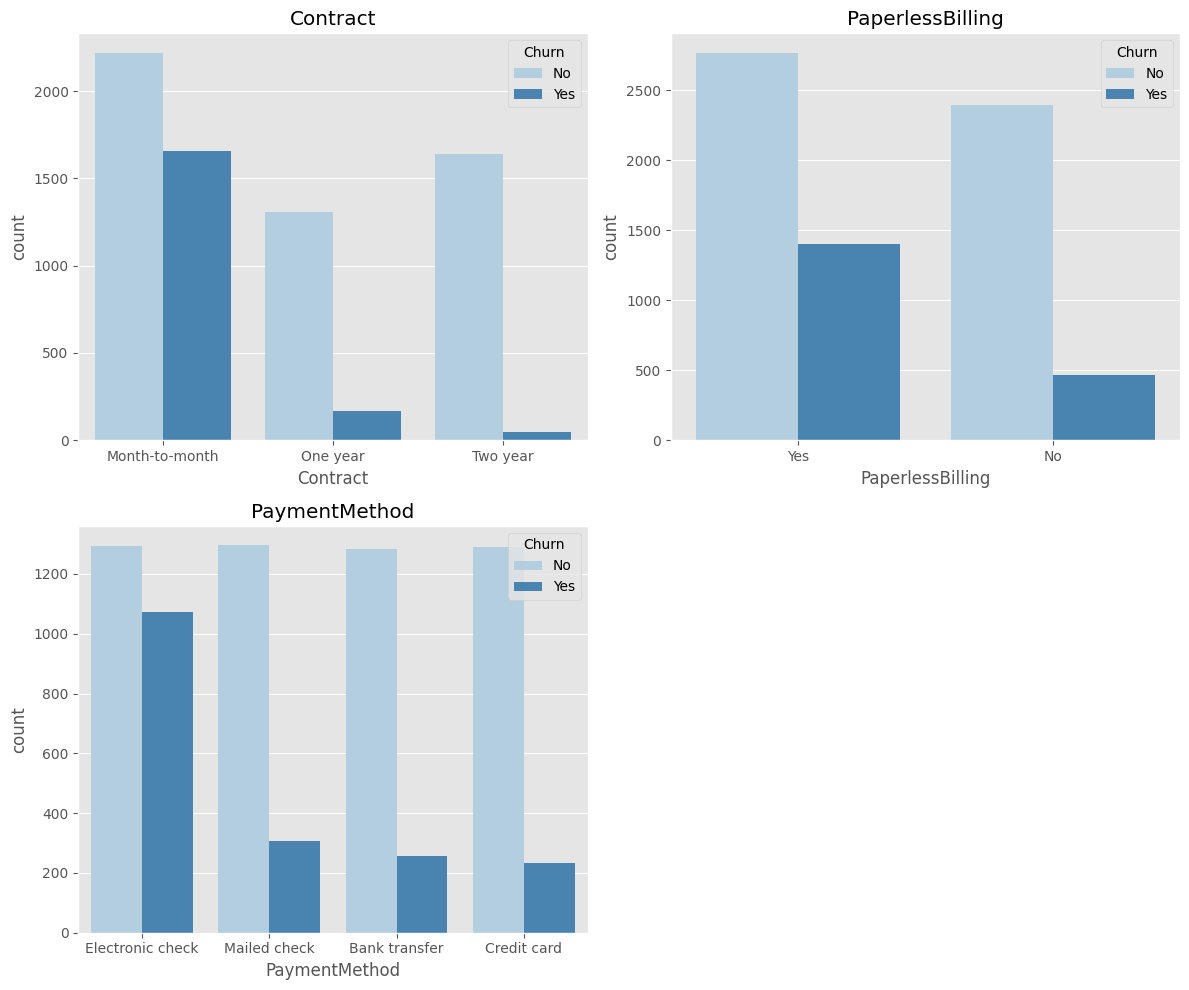

In [ ]:
# List of customer account-related features
customer_account_cat = ["Contract", "PaperlessBilling", "PaymentMethod"]

# Plot these features
plot_categorical_to_target(df, customer_account_cat, "Churn")

**Visualizing Numerical Features**

In [ ]:
# Define a function to plot numerical features against the target
def histogram_plots(df, numerical_values, target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(numerical_values) / 2)

    fig = plt.figure(figsize=(12, 5 * number_of_rows))

    for index, column in enumerate(numerical_values, 1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        sns.kdeplot(df[df[target] == "Yes"][column], fill=True, label="Churn", ax=ax)
        sns.kdeplot(df[df[target] == "No"][column], fill=True, label="No Churn", ax=ax)
        ax.set_title(column)
        ax.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

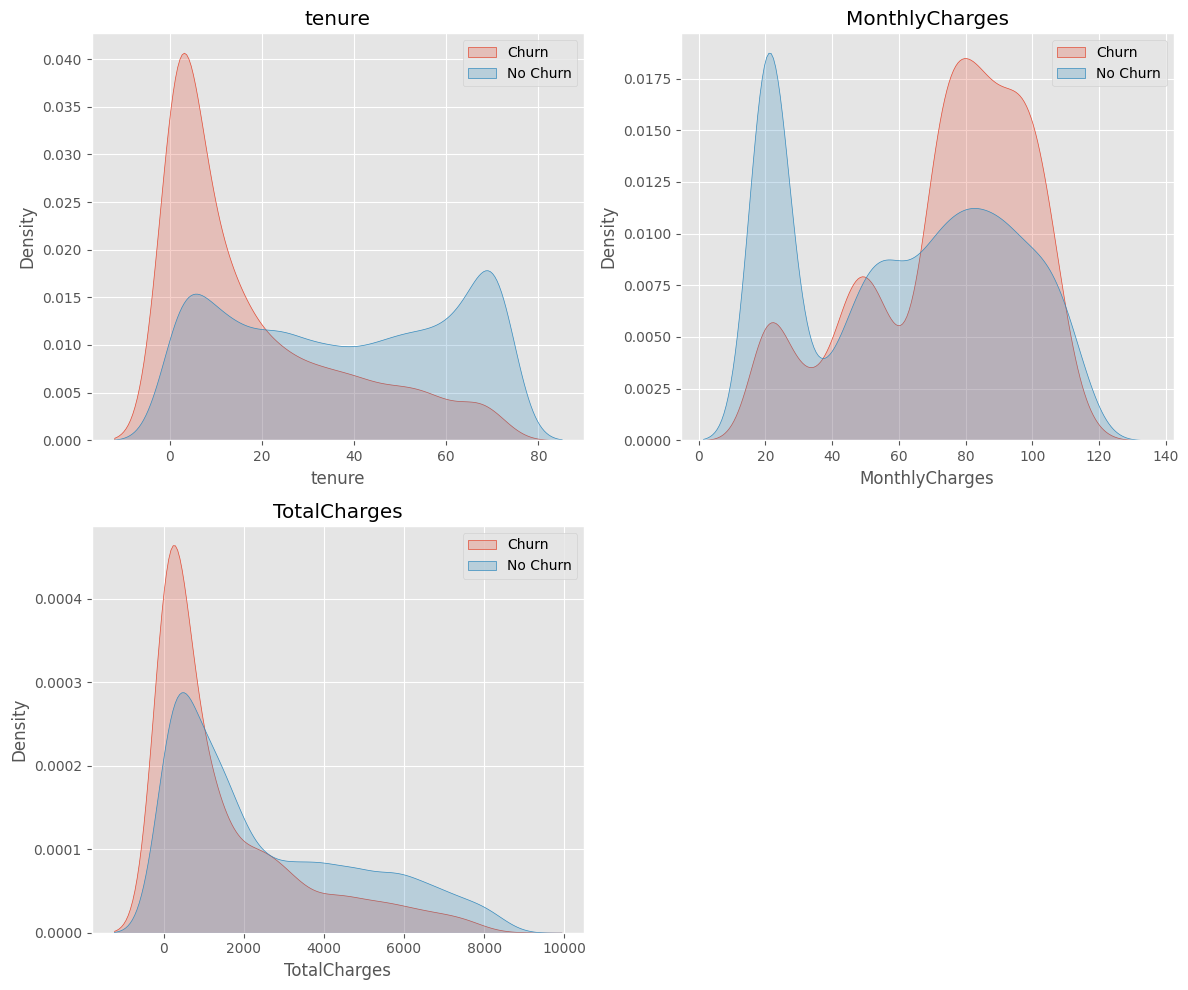

In [ ]:
# List of numerical features
customer_account_num = ["tenure", "MonthlyCharges", "TotalCharges"]

# Plot these features
histogram_plots(df, customer_account_num, "Churn")

## **3.  Data Preparation**

**Checking for Outliers Using Boxplots**

In [ ]:
# Define a function to check for outliers using boxplots for numerical variables
def outlier_check_boxplot(df, numerical_values):
    fig = plt.figure(figsize=(12, 5 * len(numerical_values) // 2))  # Create a figure for the subplots
    number_of_columns = 2
    number_of_rows = math.ceil(len(numerical_values) / number_of_columns)

    # Iterate over numerical columns and create boxplots
    for index, column in enumerate(numerical_values, 1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        sns.boxplot(x=column, data=df, palette="Blues", ax=ax)
        ax.set_title(column)

    # Save the figure
    plt.savefig("Outliers_check.png", dpi=300)
    plt.show()

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

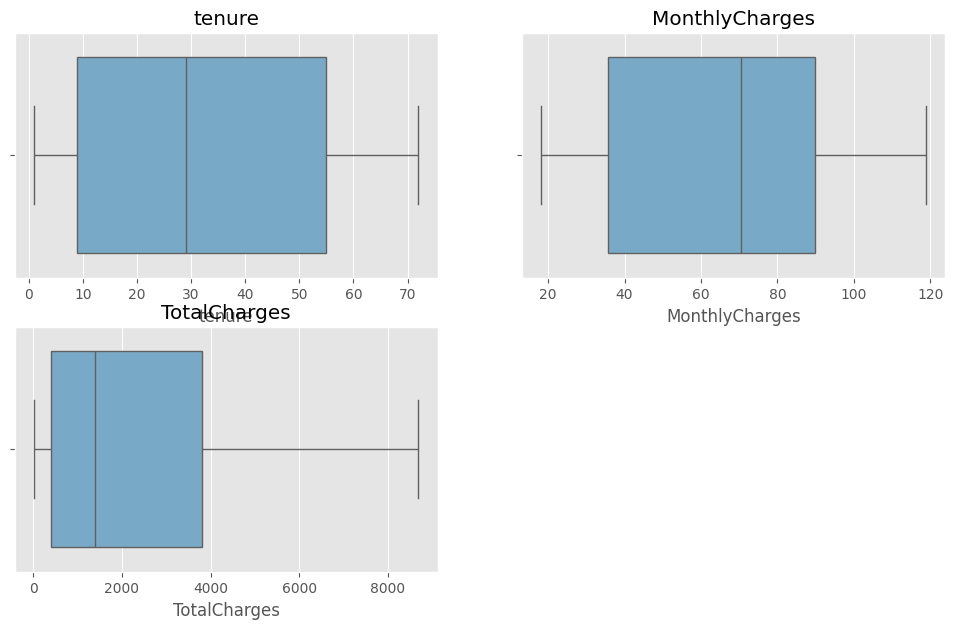

In [ ]:
# Numerical features to check for outliers
numerical_values = ["tenure", "MonthlyCharges", "TotalCharges"]

# Call the function
outlier_check_boxplot(df, numerical_values)

**Feature Engineering**

Label Encoding for Binary Categorical Variables

In [ ]:
# Function to perform label encoding on specified features
def label_encoding(df, features):
    for i in features:
        df[i] = df[i].map({'Yes': 1, 'No': 0})
    return df

# List of binary categorical features to encode
feature_le = ["Partner", "Dependents", "PhoneService", "Churn", "PaperlessBilling"]

In [ ]:
# Apply label encoding
df = label_encoding(df, feature_le)

# Encode 'gender' as a binary variable
df['gender'] = df['gender'].map({'Female': 1, 'Male': 0})

One-Hot Encoding for Multi-Class Categorical Variables

In [ ]:
# List of multi-class categorical features for one-hot encoding
features_ohe = ["MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
                "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
                "Contract", "PaymentMethod"]

# Apply one-hot encoding
df = pd.get_dummies(df, columns=features_ohe, drop_first=True)

**Feature Scaling Using MinMaxScaler**

In [ ]:
# List of numerical features to scale
features_mms = ["tenure", "MonthlyCharges", "TotalCharges"]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling to numerical features
df[features_mms] = scaler.fit_transform(df[features_mms])

**Correlation Analysis**

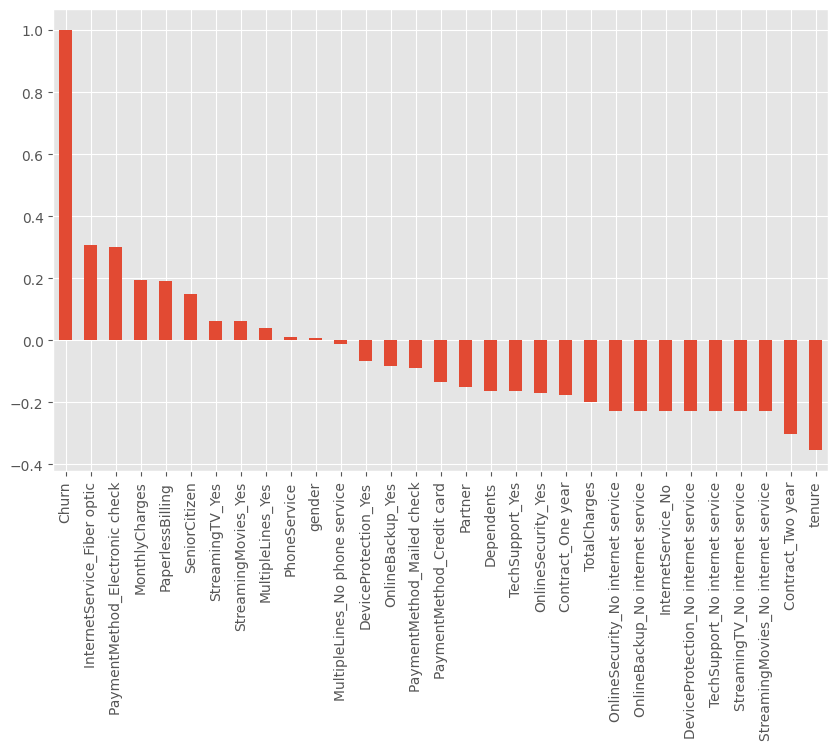

In [ ]:
# Plot correlation matrix
plt.figure(figsize=(10, 6))
df.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')
plt.savefig("correlation.png", dpi=300)
plt.show()

**Splitting Data into Training and Testing Sets**

In [ ]:
# Define features and target variable
X = df.drop(columns=["Churn"])  # Features
y = df["Churn"]  # Target variable

In [ ]:
# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Display the shape of training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5625, 30), (1407, 30), (5625,), (1407,))

## **4. Modeling & 5. Evaluation**

**Defining Functions for Evaluation Metrics**

In [ ]:
# Function to extract and display feature weights for logistic regression
def feature_weights(X_df, classifier, classifier_name):
    # Extract and sort feature weights
    weights = pd.Series(classifier.coef_[0], index=X_df.columns.values).sort_values(ascending=False)

    # Plot top 10 feature weights
    top_10_weights = weights[:10]
    plt.figure(figsize=(7, 6))
    top_10_weights.plot(kind="bar")
    plt.title(f'{classifier_name} - Top 10 Features')
    plt.show()

    # Plot bottom 10 feature weights
    bottom_10_weights = weights[-10:]
    plt.figure(figsize=(7, 6))
    bottom_10_weights.plot(kind="bar")
    plt.title(f'{classifier_name} - Bottom 10 Features')
    plt.show()

**Function to Plot Confusion Matrix**

In [ ]:
# Function to plot confusion matrix

def confusion_matrix_plot(X_train, y_train, X_test, y_test, y_pred, classifier, classifier_name):
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
    disp.plot()
    plt.title(f'Confusion Matrix - {classifier_name}')
    plt.show()

    # Calculate and print accuracy scores
    print(f'Accuracy Score Test = {accuracy_score(y_test, y_pred)}')
    print(f'Accuracy Score Train = {classifier.score(X_train, y_train)}\n')

**Function to Plot ROC Curve and Calculate AUC Score**

In [ ]:
# Function to plot ROC curve and calculate AUC score

def roc_curve_auc_score(X_test, y_test, y_pred_probabilities, classifier_name):
    # Extract predicted probabilities for the positive class
    y_pred_prob = y_pred_probabilities[:, 1]

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=f'{classifier_name}')
    plt.title(f'{classifier_name} - ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

    # Calculate and print AUC score
    auc_score = roc_auc_score(y_test, y_pred_prob)
    print(f'AUC Score (ROC): {auc_score}')

**Function to Plot Precision-Recall Curve and Calculate F1 Score**

In [ ]:
# Function to plot precision-recall curve and calculate F1 score

def precision_recall_curve_and_scores(X_test, y_test, y_pred, y_pred_probabilities, classifier_name):
    # Extract predicted probabilities for the positive class
    y_pred_prob = y_pred_probabilities[:, 1]

    # Compute precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

    # Plot precision-recall curve
    plt.plot(recall, precision, label=f'{classifier_name}')
    plt.title(f'{classifier_name} - Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

    # Calculate F1 score and AUC score for precision-recall curve
    f1_score_result = f1_score(y_test, y_pred)
    auc_score = auc(recall, precision)
    print(f'F1 Score: {f1_score_result} \nAUC Score (PR): {auc_score}')

**Implementing K-Nearest Neighbors (KNN) Classifier and Evaluating**

In [ ]:
# Initialize and train the KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)
y_pred_knn_proba = knn.predict_proba(X_test)

Evaluate the KNN classifier using the defined functions

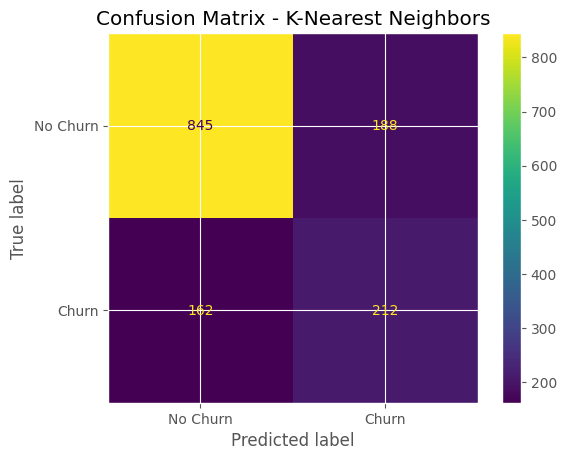

Accuracy Score Test = 0.7512437810945274
Accuracy Score Train = 0.8371555555555555



In [ ]:
confusion_matrix_plot(X_train, y_train, X_test, y_test, y_pred_knn, knn, "K-Nearest Neighbors")

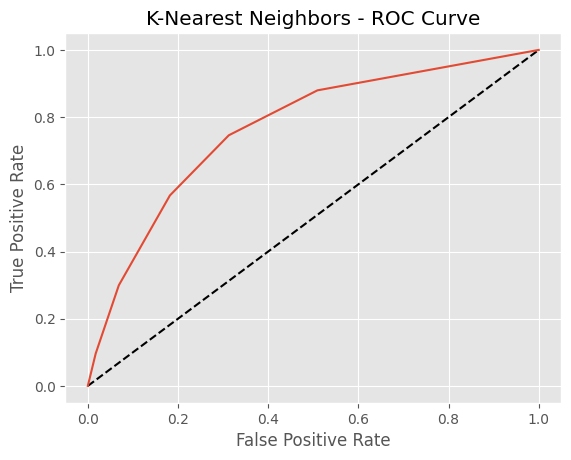

AUC Score (ROC): 0.7668464728142423


In [ ]:
roc_curve_auc_score(X_test, y_test, y_pred_knn_proba, "K-Nearest Neighbors")

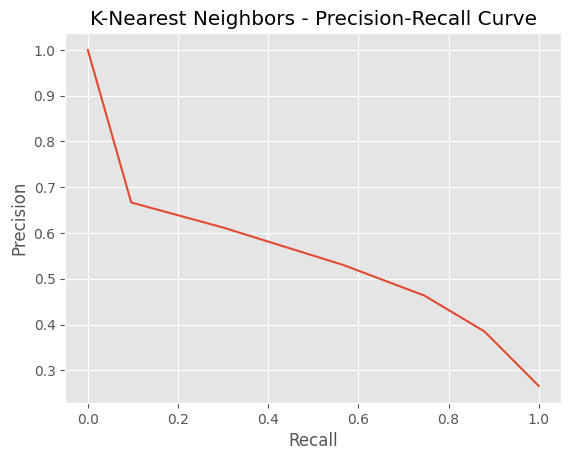

F1 Score: 0.5478036175710594 
AUC Score (PR): 0.5476389601303947


In [ ]:
precision_recall_curve_and_scores(X_test, y_test, y_pred_knn, y_pred_knn_proba, "K-Nearest Neighbors")

**Implementing Logistic Regression Classifier and Evaluating**

Train the Logistic Regression Model

In [ ]:
# Initialize and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_proba = logreg.predict_proba(X_test)

Evaluating Logistic Regression

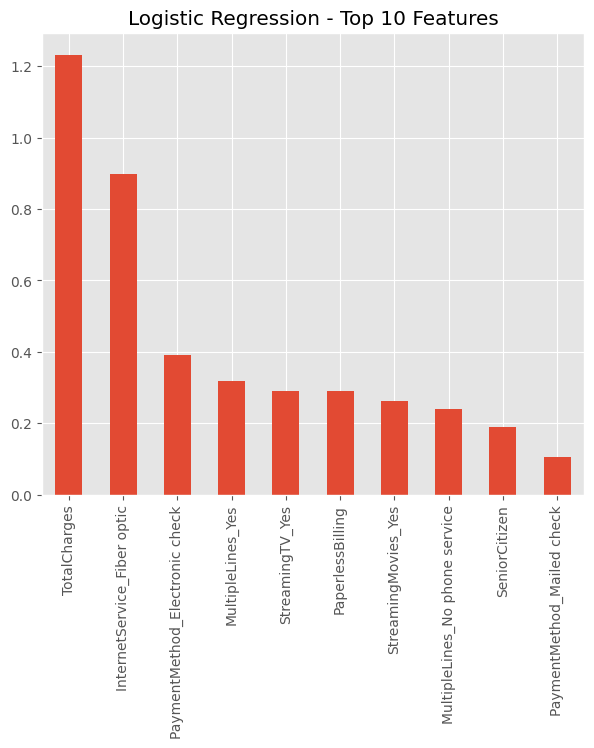

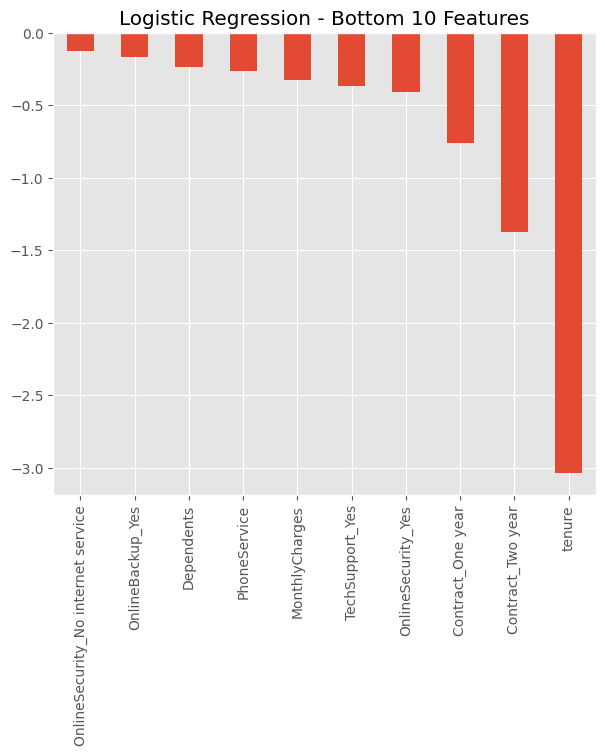

In [ ]:
# Display top and bottom feature weights
feature_weights(X_train, logreg, "Logistic Regression")

**Confusion Matrix**

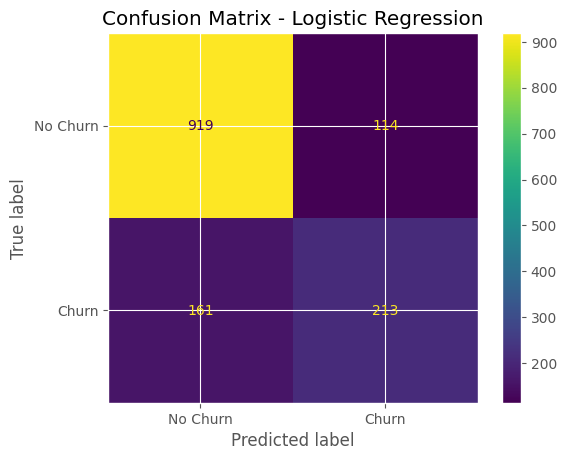

Accuracy Score Test = 0.8045486851457001
Accuracy Score Train = 0.8051555555555555



In [ ]:
# Plot confusion matrix for logistic regression
confusion_matrix_plot(X_train, y_train, X_test, y_test, y_pred_logreg, logreg, "Logistic Regression")

ROC Curve and AUC Score

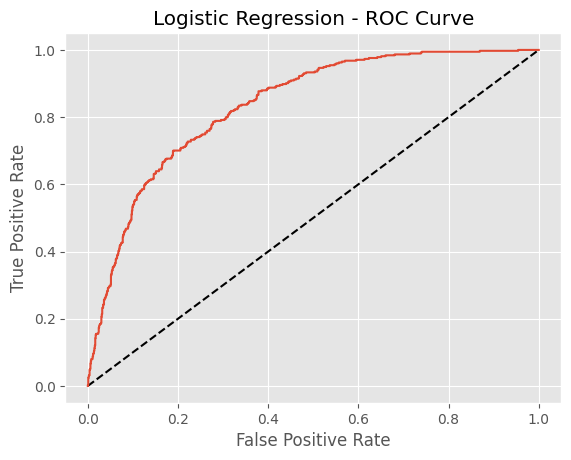

AUC Score (ROC): 0.8348315740975613


In [ ]:
# Plot ROC curve and display AUC score for logistic regression
roc_curve_auc_score(X_test, y_test, y_pred_logreg_proba, "Logistic Regression")

Precision-Recall Curve and F1 Score

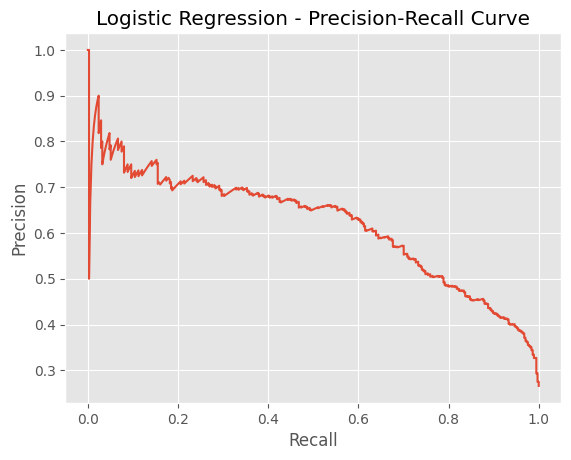

F1 Score: 0.6077032810271041 
AUC Score (PR): 0.6186665730149714


In [ ]:
# Plot Precision-Recall curve and display F1 score for logistic regression
precision_recall_curve_and_scores(X_test, y_test, y_pred_logreg, y_pred_logreg_proba, "Logistic Regression")

## **6. Deployment**

In [2]:
df = pd.read_csv(
    "/content/WA_Fn-UseC_-Telco-Customer-Churn.csv",)  # Path to the CSV file

In [3]:
import joblib

# Columns for different preprocessing steps
label_encode_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling"]
one_hot_encode_cols = ["MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
                       "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
                       "Contract", "PaymentMethod"]
min_max_scale_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

In [4]:
# Separate Features and Target
# Drop 'customerID' and 'Churn' from the features, keeping 'Churn' as the target
X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn']

In [5]:
# Debug: Print unique values of target variable before encoding
print("Unique values in 'Churn' before encoding:", y.unique())

Unique values in 'Churn' before encoding: ['No' 'Yes']


In [6]:
# Encode the Target Variable
# Initialize the LabelEncoder
le_target = LabelEncoder()

# Fit and transform the target variable 'Churn' to numerical values
y = le_target.fit_transform(y)

In [7]:
# Debug: Print unique values of target variable after encoding
print("Unique values in 'Churn' after encoding:", y)

Unique values in 'Churn' after encoding: [0 0 1 ... 0 1 0]


**Label Encoder for the Target Variable**

In [8]:
# Save the LabelEncoder for target variable
joblib.dump(le_target, 'label_encoder_target.pkl')
print("Label encoder for target saved.")

Label encoder for target saved.


**Handle Missing Values and Convert Data Types**

In [9]:
# Replace non-numeric values with NaN and fill with the mean of the column
X[min_max_scale_cols] = X[min_max_scale_cols].replace(' ', np.nan).astype(float)
X[min_max_scale_cols] = X[min_max_scale_cols].fillna(X[min_max_scale_cols].mean())

**Saving Label Encoders**

In [10]:
# **Label Encode Specified Columns**
label_encoders = {}
for col in label_encode_cols + ["gender"]:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [11]:
joblib.dump(label_encoders, 'label_encoders.pkl')
print("Label encoders saved.")

Label encoders saved.


**Saving One-Hot Encoder**

In [12]:
# **One-Hot Encode Specified Columns**
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
one_hot_encoded = one_hot_encoder.fit_transform(X[one_hot_encode_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
# Save the one-hot encoder
joblib.dump(one_hot_encoder, 'one_hot_encoder.pkl')
print("One-hot encoder saved.")

One-hot encoder saved.


**Saving MinMax Scaler**

In [14]:
# **Min-Max Scale Specified Columns**
min_max_scaler = MinMaxScaler()
scaled_numerical = min_max_scaler.fit_transform(X[min_max_scale_cols])

In [15]:
# Save the min-max scaler to a file
joblib.dump(min_max_scaler, 'min_max_scaler.pkl')
print("Min-max scaler saved.")

Min-max scaler saved.


**Combine Processed Columns**

In [16]:
# Combine label encoded columns, scaled numerical columns, and one-hot encoded columns
X_processed = np.hstack((X[label_encode_cols + ["gender"]].values, scaled_numerical, one_hot_encoded))

In [17]:
# **Split Data into Training and Testing Sets**
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

**Saving the Trained Logistic Regression Model**


In [18]:
# **Train the Model**
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [19]:
# Save the trained model
model_file = 'logistic_regression_model.pkl'
joblib.dump(model, model_file)
print(f"model saved as {model_file}.")

model saved as logistic_regression_model.pkl.



###**requirements.txt**





*   pandas
*   numpy==1.21.5
*   scikit-learn==1.2.2
*   gradio
*   joblib

### **app.py**

In [20]:
# import pandas as pd
# import numpy as np
# import joblib
# import gradio as gr


# # Load the preprocessing steps and the model
# label_encoders = joblib.load('label_encoders.pkl')
# one_hot_encoder = joblib.load('one_hot_encoder.pkl')
# min_max_scaler = joblib.load('min_max_scaler.pkl')
# model = joblib.load('logistic_regression_model.pkl')
# le_target = joblib.load('label_encoder_target.pkl')


# def preprocess_data(data):
#     """
#     Preprocess the input data for prediction.

#     Parameters:
#     data (dict): Dictionary containing input data.

#     Returns:
#     np.array: Processed data ready for prediction.
#     """
#     df = pd.DataFrame([data])

#     label_encode_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "gender"]
#     one_hot_encode_cols = ["MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
#                            "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
#                            "Contract", "PaymentMethod"]
#     min_max_scale_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

#     # Strip leading and trailing spaces from string inputs
#     for col in label_encode_cols + one_hot_encode_cols:
#         df[col] = df[col].str.strip()

#     # Convert non-numeric values to NaN and fill them with the mean of the column
#     df[min_max_scale_cols] = df[min_max_scale_cols].replace(' ', np.nan).astype(float)
#     df[min_max_scale_cols] = df[min_max_scale_cols].fillna(df[min_max_scale_cols].mean())

#     # Label encode specified columns
#     for col in label_encode_cols:
#         le = label_encoders[col]
#         df[col] = le.transform(df[col])

#     # One-hot encode specified columns
#     one_hot_encoded = one_hot_encoder.transform(df[one_hot_encode_cols])

#     # Min-max scale specified columns
#     scaled_numerical = min_max_scaler.transform(df[min_max_scale_cols])

#     # Combine processed columns into one DataFrame
#     X_processed = np.hstack((df[label_encode_cols].values, scaled_numerical, one_hot_encoded))

#     return X_processed


# def predict(gender, senior_citizen, partner, dependents, tenure, phone_service, multiple_lines, internet_service,
#             online_security, online_backup, device_protection, tech_support, streaming_tv, streaming_movies,
#             contract, paperless_billing, payment_method, monthly_charges, total_charges):
#     """
#     Predict the churn status of a customer.

#     Parameters:
#     Various input features as separate parameters.

#     Returns:
#     str: Prediction result ("Churn" or "No Churn").
#     """
#     data = {
#         "gender": gender,
#         "SeniorCitizen": senior_citizen,
#         "Partner": partner,
#         "Dependents": dependents,
#         "tenure": tenure,
#         "PhoneService": phone_service,
#         "MultipleLines": multiple_lines,
#         "InternetService": internet_service,
#         "OnlineSecurity": online_security,
#         "OnlineBackup": online_backup,
#         "DeviceProtection": device_protection,
#         "TechSupport": tech_support,
#         "StreamingTV": streaming_tv,
#         "StreamingMovies": streaming_movies,
#         "Contract": contract,
#         "PaperlessBilling": paperless_billing,
#         "PaymentMethod": payment_method,
#         "MonthlyCharges": monthly_charges,
#         "TotalCharges": total_charges
#     }

#     try:
#         X_new = preprocess_data(data)
#         prediction = model.predict(X_new)
#         prediction = le_target.inverse_transform(prediction)
#         return "Churn" if prediction[0] == 'Yes' else "No Churn"
#     except Exception as e:
#         print("Error during prediction:", e)
#         return str(e)

# # Define the Gradio interface
# inputs = [
#     gr.Radio(label="Gender", choices=["Female", "Male"]),
#     gr.Number(label="Senior Citizen (0 or 1)"),
#     gr.Radio(label="Partner", choices=["Yes", "No"]),
#     gr.Radio(label="Dependents", choices=["Yes", "No"]),
#     gr.Number(label="Tenure (integer)"),
#     gr.Radio(label="Phone Service", choices=["Yes", "No"]),
#     gr.Radio(label="Multiple Lines", choices=["Yes", "No", "No phone service"]),
#     gr.Radio(label="Internet Service", choices=["DSL", "Fiber optic", "No"]),
#     gr.Radio(label="Online Security", choices=["Yes", "No", "No internet service"]),
#     gr.Radio(label="Online Backup", choices=["Yes", "No", "No internet service"]),
#     gr.Radio(label="Device Protection", choices=["Yes", "No", "No internet service"]),
#     gr.Radio(label="Tech Support", choices=["Yes", "No", "No internet service"]),
#     gr.Radio(label="Streaming TV", choices=["Yes", "No", "No internet service"]),
#     gr.Radio(label="Streaming Movies", choices=["Yes", "No", "No internet service"]),
#     gr.Radio(label="Contract", choices=["Month-to-month", "One year", "Two year"]),
#     gr.Radio(label="Paperless Billing", choices=["Yes", "No"]),
#     gr.Radio(label="Payment Method", choices=["Electronic check", "Mailed check", "Bank transfer (automatic)", "Credit card (automatic)"]),
#     gr.Number(label="Monthly Charges (float)"),
#     gr.Number(label="Total Charges (float)")
# ]

# outputs = gr.Textbox(label="Prediction")

# # Create the Gradio interface
# gr.Interface(fn=predict, inputs=inputs, outputs=outputs, title="Churn Prediction Model").launch()

# **Housing Prices Dataset** (Planning Phase Chapter 2)

Importing Necessary Libraries

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load the data

In [22]:
# Load the dataset from a CSV file
df = pd.read_csv("/content/Housing.csv")

Understand the data structure

In [23]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [24]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [26]:
# Display summary statistics of numerical columns
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Data Cleaning

In [27]:
# Check for duplicates and remove them
df.drop_duplicates(inplace=True)

# Check for null values and handle them
print(df.isna().sum())  # Show columns with missing values
df.dropna(inplace=True)  # Drop rows with missing values

# Convert object columns to categorical to optimize memory usage
object_columns = df.select_dtypes(include=['object']).columns
for column in object_columns:
    df[column] = df[column].astype('category')

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


Exploratory Data Analysis (EDA)

Handling Outliers

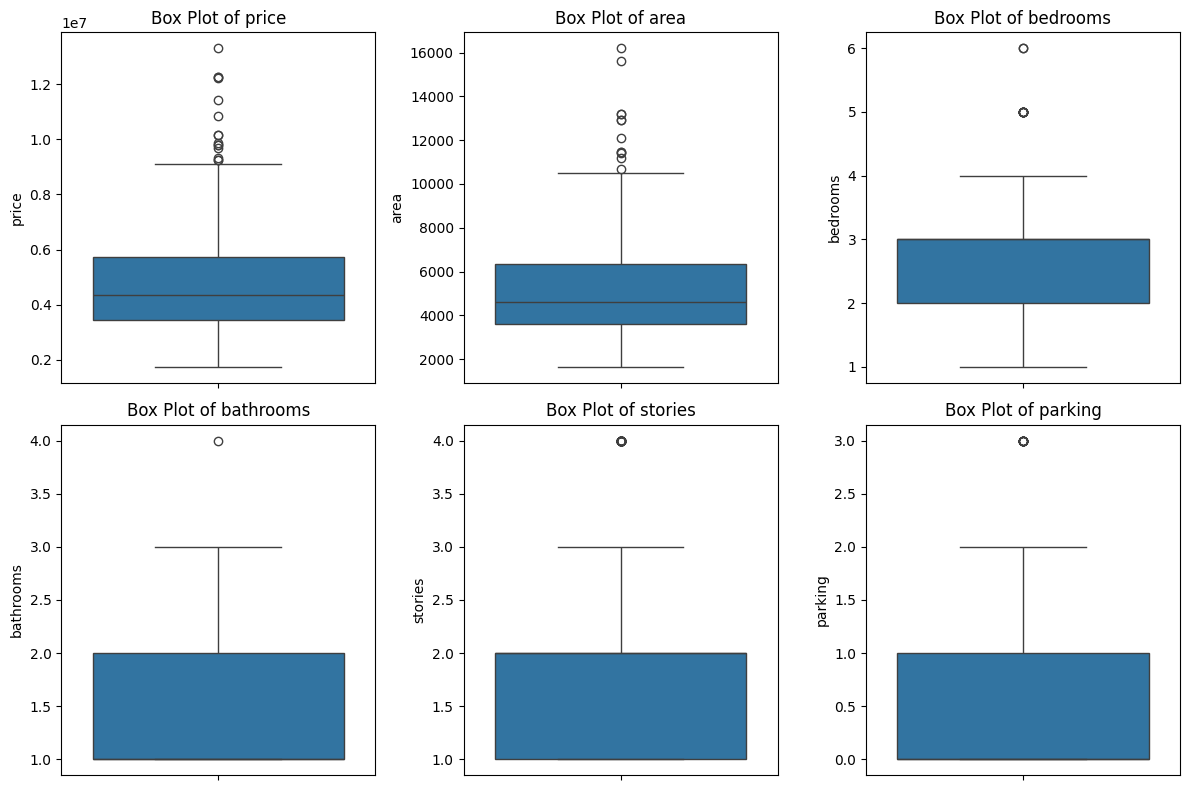

In [28]:
# Box plot to identify outliers
plt.figure(figsize=(12, 8))
columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
for i, col in enumerate(columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

# Remove outliers using IQR method
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
df = df[(df['price'] >= Q1_price - 1.5 * IQR_price) & (df['price'] <= Q3_price + 1.5 * IQR_price)]

Q1_area = df['area'].quantile(0.25)
Q3_area = df['area'].quantile(0.75)
IQR_area = Q3_area - Q1_area
df = df[(df['area'] >= Q1_area - 1.5 * IQR_area) & (df['area'] <= Q3_area + 1.5 * IQR_area)]

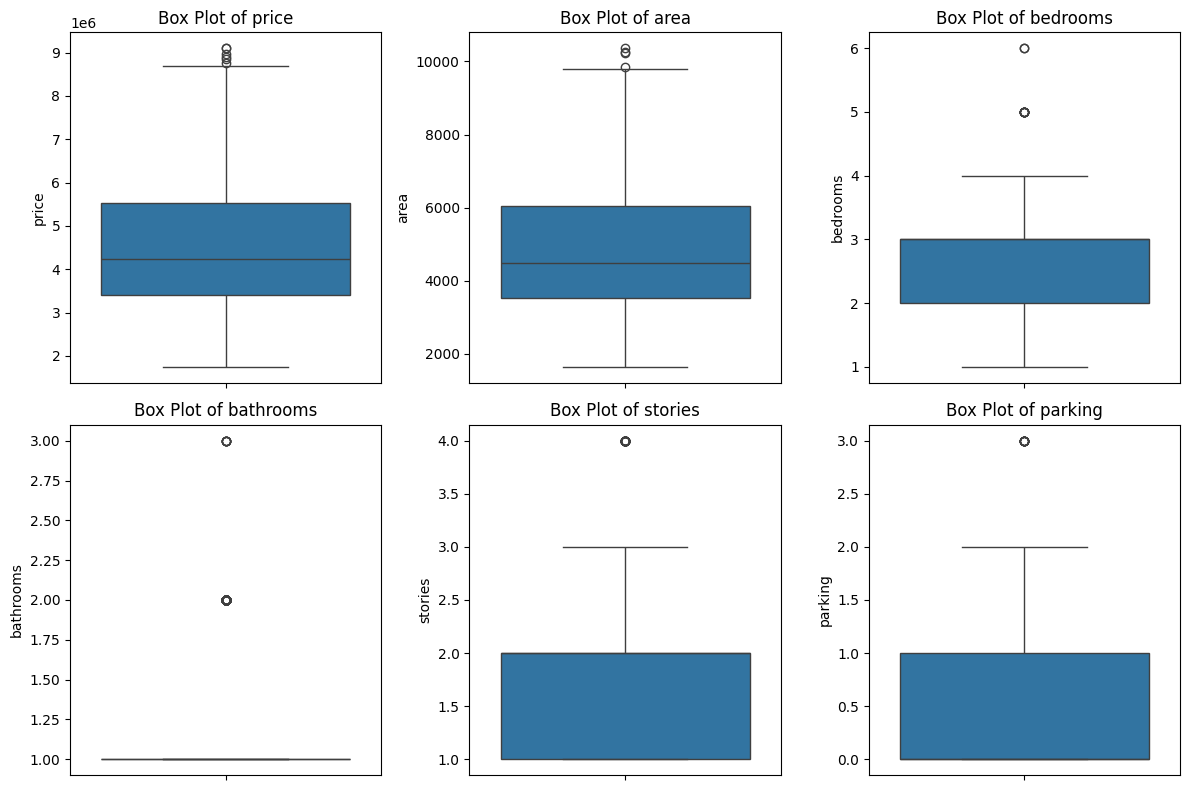

In [29]:
# Box plot to identify outliers
plt.figure(figsize=(12, 8))
columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
for i, col in enumerate(columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

Visualizations

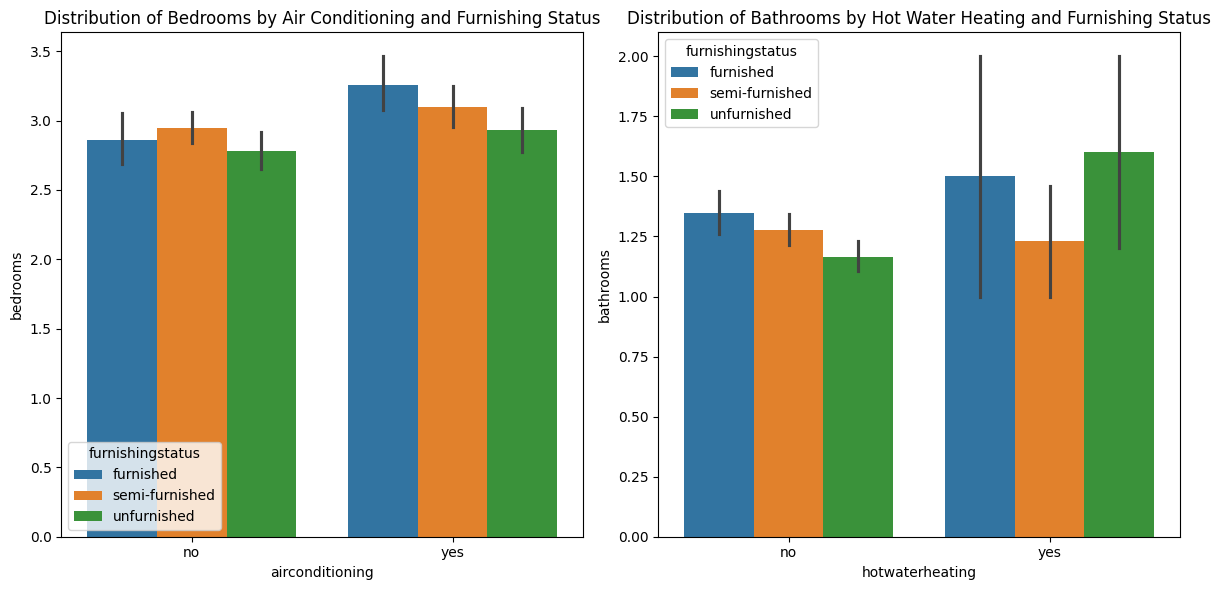

In [ ]:
# Bar plots for categorical features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='airconditioning', y='bedrooms', hue='furnishingstatus', data=df)
plt.title('Distribution of Bedrooms by Air Conditioning and Furnishing Status')

plt.subplot(1, 2, 2)
sns.barplot(x='hotwaterheating', y='bathrooms', hue='furnishingstatus', data=df)
plt.title('Distribution of Bathrooms by Hot Water Heating and Furnishing Status')
plt.tight_layout()
plt.show()

In [30]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

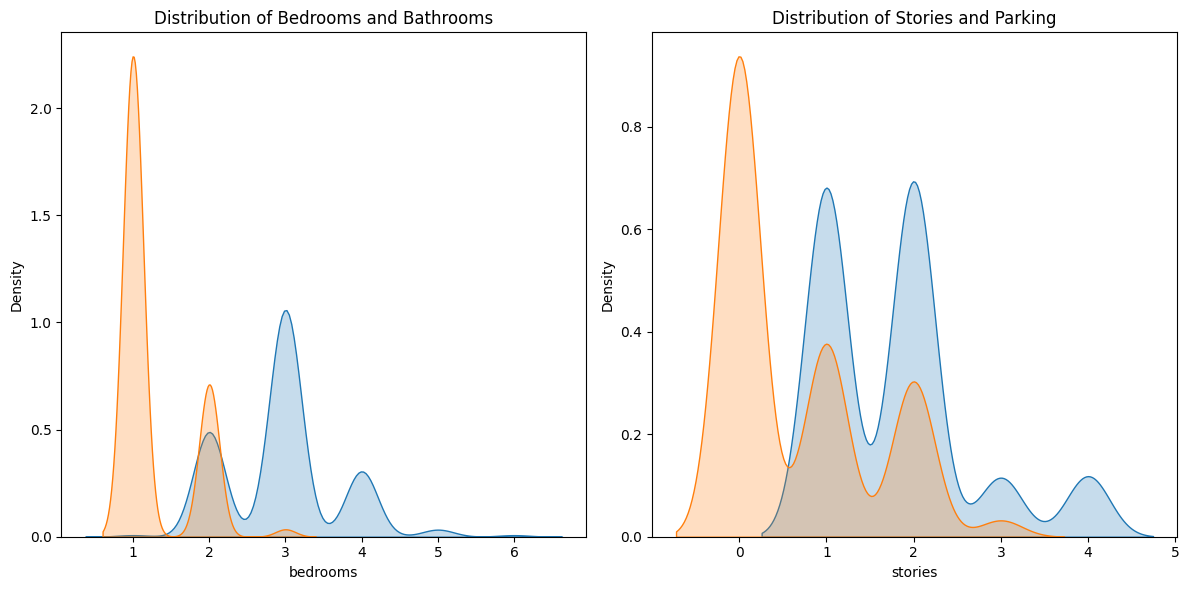

In [31]:
# Distplot for numerical features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(df['bedrooms'], label='Bedrooms', shade=True)
sns.kdeplot(df['bathrooms'], label='Bathrooms', shade=True)
plt.title('Distribution of Bedrooms and Bathrooms')

plt.subplot(1, 2, 2)
sns.kdeplot(df['stories'], label='Stories', shade=True)
sns.kdeplot(df['parking'], label='Parking', shade=True)
plt.title('Distribution of Stories and Parking')
plt.tight_layout()
plt.show()

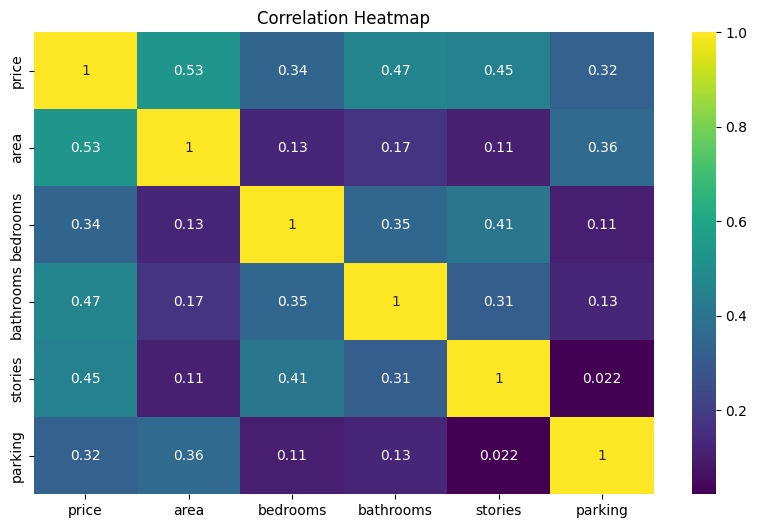

In [32]:
# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), cmap='viridis', annot=True)
plt.title('Correlation Heatmap')
plt.show()

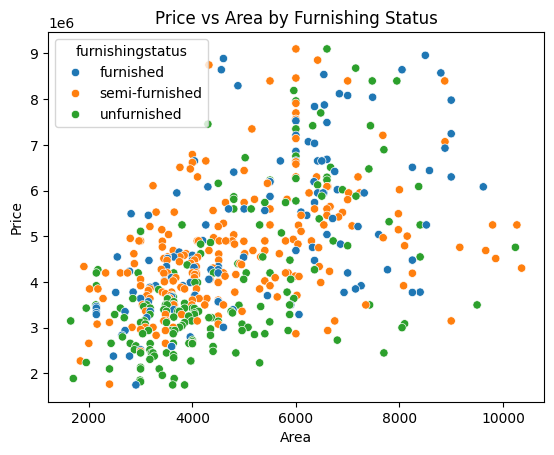

In [33]:
# Scatter plot for price vs area by furnishing status
sns.scatterplot(x=df['area'], y=df['price'], hue=df['furnishingstatus'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price vs Area by Furnishing Status')
plt.show()

# **Validation and Evaluation** (Chapter 3)

**Model Validation Techniques**

In [34]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

K-Fold Cross-Validation

In [36]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Initialize KFold with 5 splits
kf = KFold(n_splits=5)
accuracy_scores = []

# Iterate through each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize and fit the logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Calculate the mean accuracy score
mean_accuracy = np.mean(accuracy_scores)
print(f"Mean Accuracy: {mean_accuracy}")

Mean Accuracy: 0.9266666666666665


Stratified K-Fold Cross-Validation

In [37]:
from sklearn.model_selection import StratifiedKFold

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Initialize model
model = LogisticRegression()

# Example of Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 1.0
Accuracy: 0.9666666666666667
Accuracy: 0.9333333333333333
Accuracy: 1.0
Accuracy: 0.9333333333333333


Leave-One-Out Cross-Validation (LOOCV)

In [38]:
from sklearn.model_selection import LeaveOneOut

# Initialize LeaveOneOut
loo = LeaveOneOut()

# Split data into training and testing sets using indices
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy:', accuracy)


Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 0.0
Accura

Repeated K-Fold Cross-Validation

In [39]:
from sklearn.model_selection import RepeatedKFold

# Initialize RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
accuracy_scores = []

# Example of Repeated K-Fold Cross-Validation
for train_index, test_index in rkf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

average_accuracy = np.mean(accuracy_scores)
print(f"Average Accuracy: {average_accuracy}")


Average Accuracy: 0.9688888888888889


**Performance Metrics and Evaluation**

Classification Metrics:
Accuracy: 0.7142857142857143
Precision: 0.75
Recall: 0.75
F1-Score: 0.75


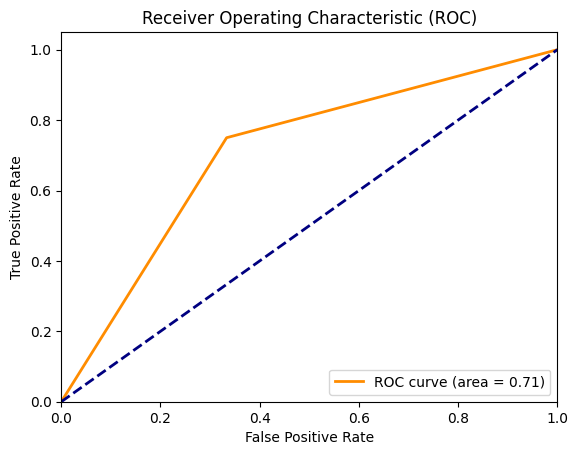

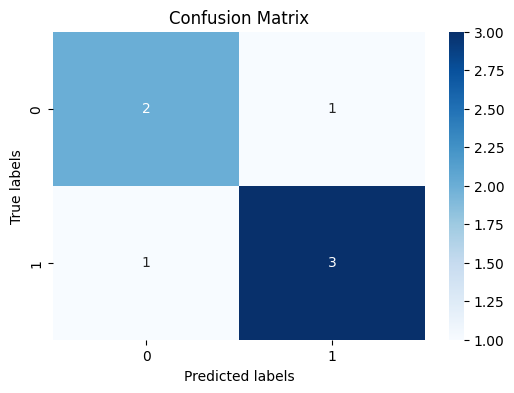

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to calculate classification metrics
def classification_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

# Example classification data
y_true_classification = np.array([1, 1, 0, 1, 0, 0, 1])
y_pred_classification = np.array([1, 0, 0, 1, 0, 1, 1])

# Calculate metrics
accuracy, precision, recall, f1 = classification_metrics(y_true_classification, y_pred_classification)

# Print results
print("Classification Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_true_classification, y_pred_classification)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot confusion matrix
conf_matrix = confusion_matrix(y_true_classification, y_pred_classification)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

**Regression Metrics**

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define a function to calculate regression metrics
def regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

# Example regression data
y_true_regression = np.array([2.5, 3.5, 4.0, 5.0, 6.0])
y_pred_regression = np.array([2.0, 3.0, 3.5, 4.5, 5.5])

# Calculate metrics
mse, mae, r2 = regression_metrics(y_true_regression, y_pred_regression)

# Print results
print("Regression Metrics:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Regression Metrics:
Mean Squared Error (MSE): 0.25
Mean Absolute Error (MAE): 0.5
R-squared (R2): 0.8287671232876712


# **Mentoring and Maintenance** (Chapter 4)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Example data for model evaluation
y_true_initial = np.array([1, 0, 1, 1, 0, 1])
y_pred_initial = np.array([1, 0, 1, 0, 0, 0])

y_true_updated = np.array([1, 0, 0, 0, 0, 0])
y_pred_updated = np.array([0, 0, 0, 0, 0, 0])

# Function to calculate performance metrics with zero_division parameter to avoid UndefinedMetricWarning
def model_performance(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=1)  # Set zero_division=1 to handle cases with no positive predictions
    recall = recall_score(y_true, y_pred, zero_division=1)        # Set zero_division=1 to handle cases with no positive labels
    f1 = f1_score(y_true, y_pred, zero_division=1)                # Set zero_division=1 to handle cases with no positive samples
    return accuracy, precision, recall, f1

# Function to detect concept drift
def detect_concept_drift(y_true_initial, y_pred_initial, y_true_updated, y_pred_updated):
    concept_drift = np.any(y_pred_initial != y_pred_updated)
    return concept_drift

# Initial Model Performance
print("\nInitial Model Performance:")
accuracy_initial, precision_initial, recall_initial, f1_initial = model_performance(y_true_initial, y_pred_initial)
print("Accuracy:", accuracy_initial)
print("Precision:", precision_initial)
print("Recall:", recall_initial)
print("F1-Score:", f1_initial)

# Updated Model Performance
print("\nUpdated Model Performance:")
accuracy_updated, precision_updated, recall_updated, f1_updated = model_performance(y_true_updated, y_pred_updated)
print("Accuracy:", accuracy_updated)
print("Precision:", precision_updated)
print("Recall:", recall_updated)
print("F1-Score:", f1_updated)

# Concept Drift Detection
concept_drift_detected = detect_concept_drift(y_true_initial, y_pred_initial, y_true_updated, y_pred_updated)
if concept_drift_detected:
    print("\nConcept Drift Detected: Model may need retraining.")
else:
    print("\nNo Concept Drift Detected.")


Initial Model Performance:
Accuracy: 0.6666666666666666
Precision: 1.0
Recall: 0.5
F1-Score: 0.6666666666666666

Updated Model Performance:
Accuracy: 0.8333333333333334
Precision: 1.0
Recall: 0.0
F1-Score: 0.0

Concept Drift Detected: Model may need retraining.


# **Applying A Machine Learning Project "Iris Species"** (Chapter 6)

**Import Libraries and Load the Data**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Initial Data Exploration and Cleaning**

In [ ]:
# Check the shape of the data
print(df.shape)

(150, 6)


In [ ]:
# View the columns
print(df.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [ ]:
# Remove 'Id' column as it does not contribute to the analysis
df.drop(columns=['Id'], inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Check for duplicates and remove them
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

3
0


In [ ]:
# Check for null values
print(df.isna().sum())

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [ ]:
# Display data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  147 non-null    float64
 1   SepalWidthCm   147 non-null    float64
 2   PetalLengthCm  147 non-null    float64
 3   PetalWidthCm   147 non-null    float64
 4   Species        147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [ ]:
# Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,147.0,5.856463,0.829100,4.3,5.1,5.8,6.4,7.9
SepalWidthCm,147.0,3.055782,0.437009,2.0,2.8,3.0,3.3,4.4
PetalLengthCm,147.0,3.780272,1.759111,1.0,1.6,4.4,5.1,6.9
PetalWidthCm,147.0,1.208844,0.757874,0.1,0.3,1.3,1.8,2.5


**Data Visualization**

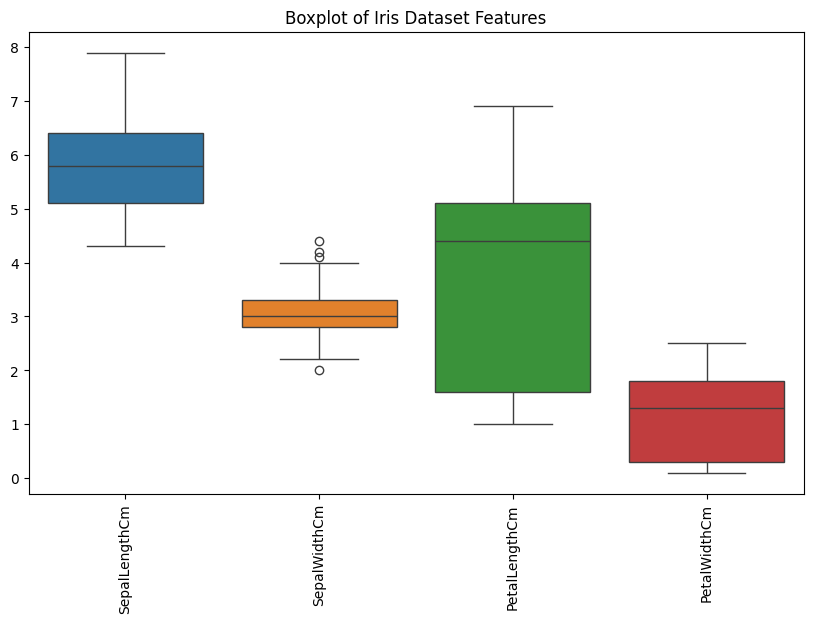

In [ ]:
# Boxplot to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Iris Dataset Features')
plt.xticks(rotation=90)
plt.show()

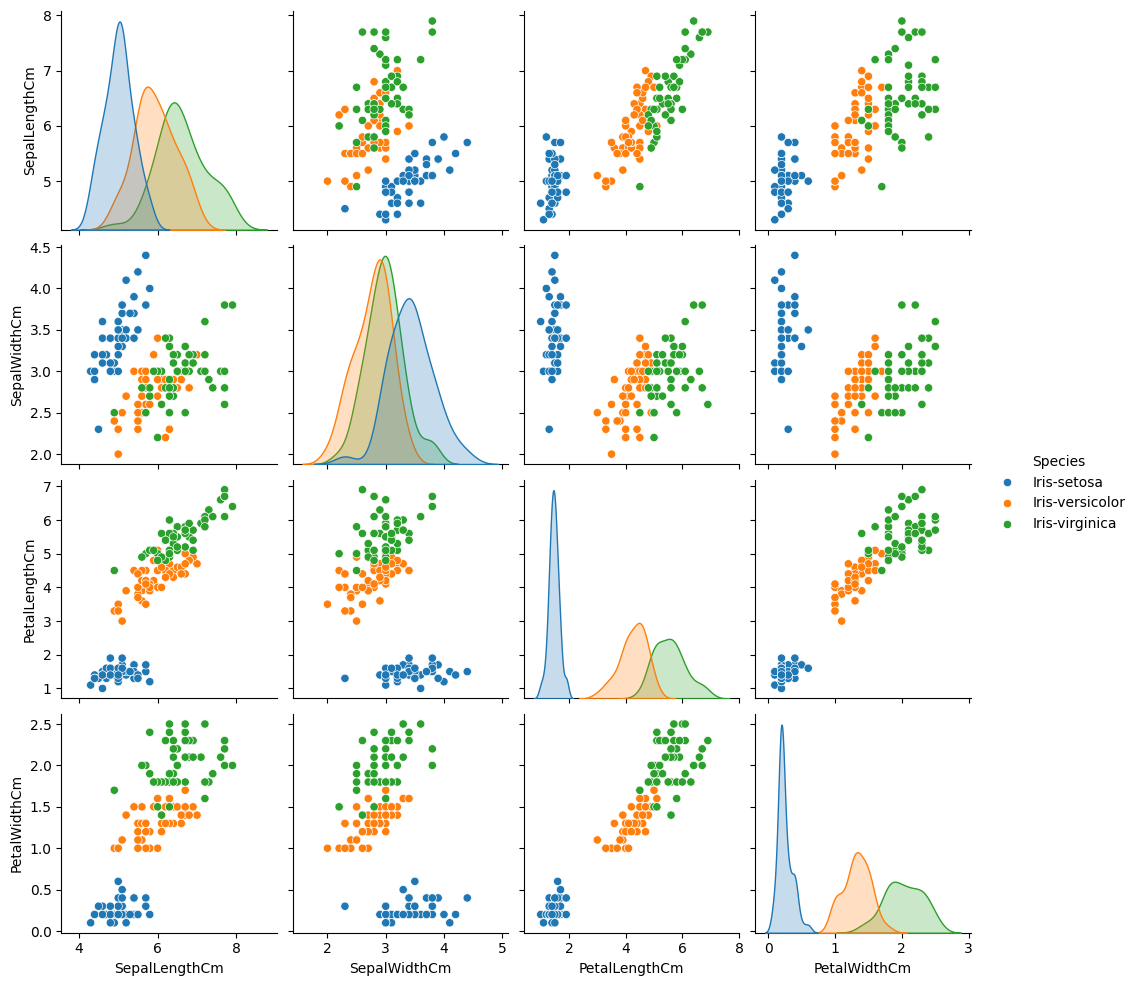

In [ ]:
# Pairplot to show relationships between features
sns.pairplot(df, hue='Species')
plt.show()

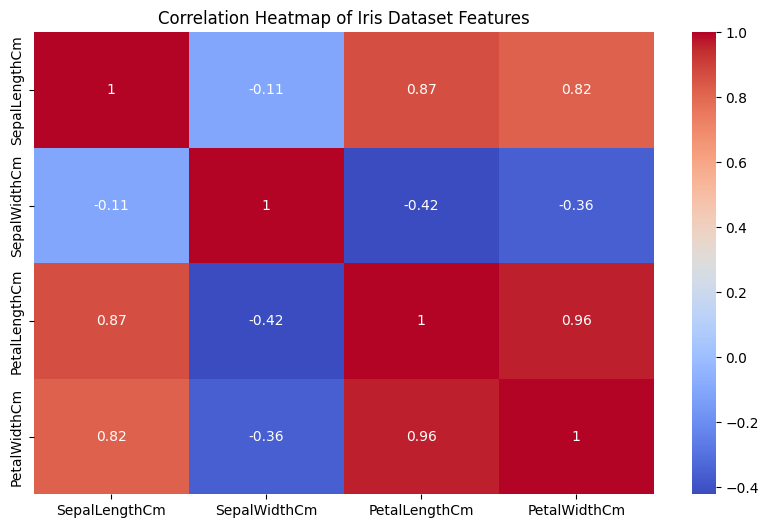

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop('Species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Iris Dataset Features')
plt.show()

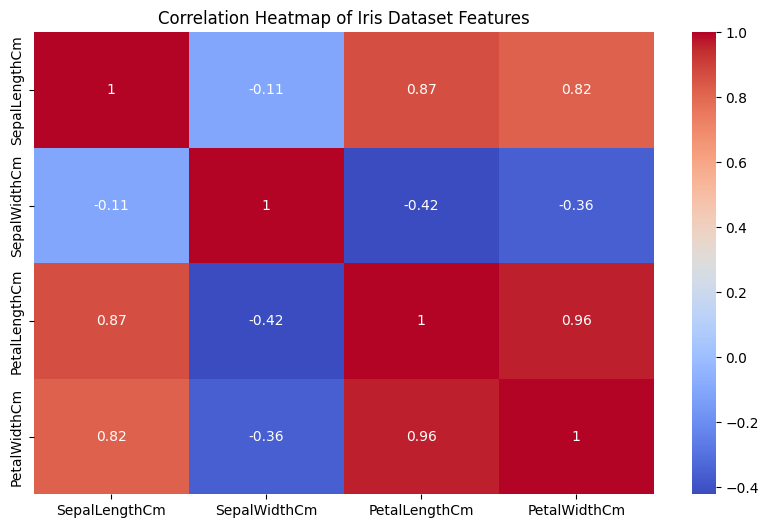

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop('Species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Iris Dataset Features')
plt.show()


<Figure size 1000x600 with 0 Axes>

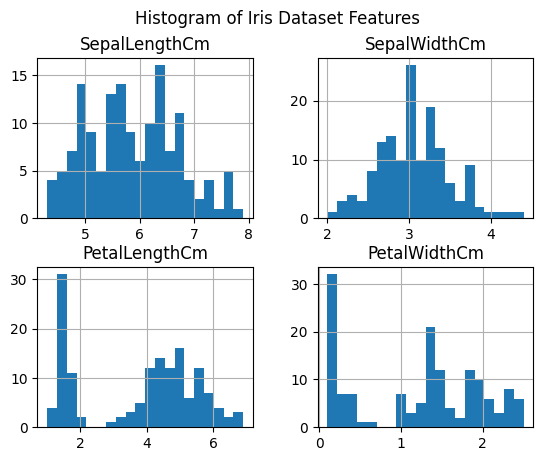

In [ ]:
# Histograms of features
plt.figure(figsize=(10, 6))
df.drop('Species', axis=1).hist(bins=20)
plt.suptitle('Histogram of Iris Dataset Features')
plt.show()


**Preprocessing for Machine Learning**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Encode the target variable
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])
print(df['Species'].value_counts())

# Define features and target variable
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Species
1    50
2    49
0    48
Name: count, dtype: int64


**Model Training and Evaluation**

In [ ]:
# Initialize and train the model
model = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Confusion Matrix:
[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Accuracy: 0.93
